#Visualize Diagrams with Python

we can do this with python package called Diagrams

[official documentation](https://diagrams.mingrammer.com/)

In [1]:
!pip install diagrams


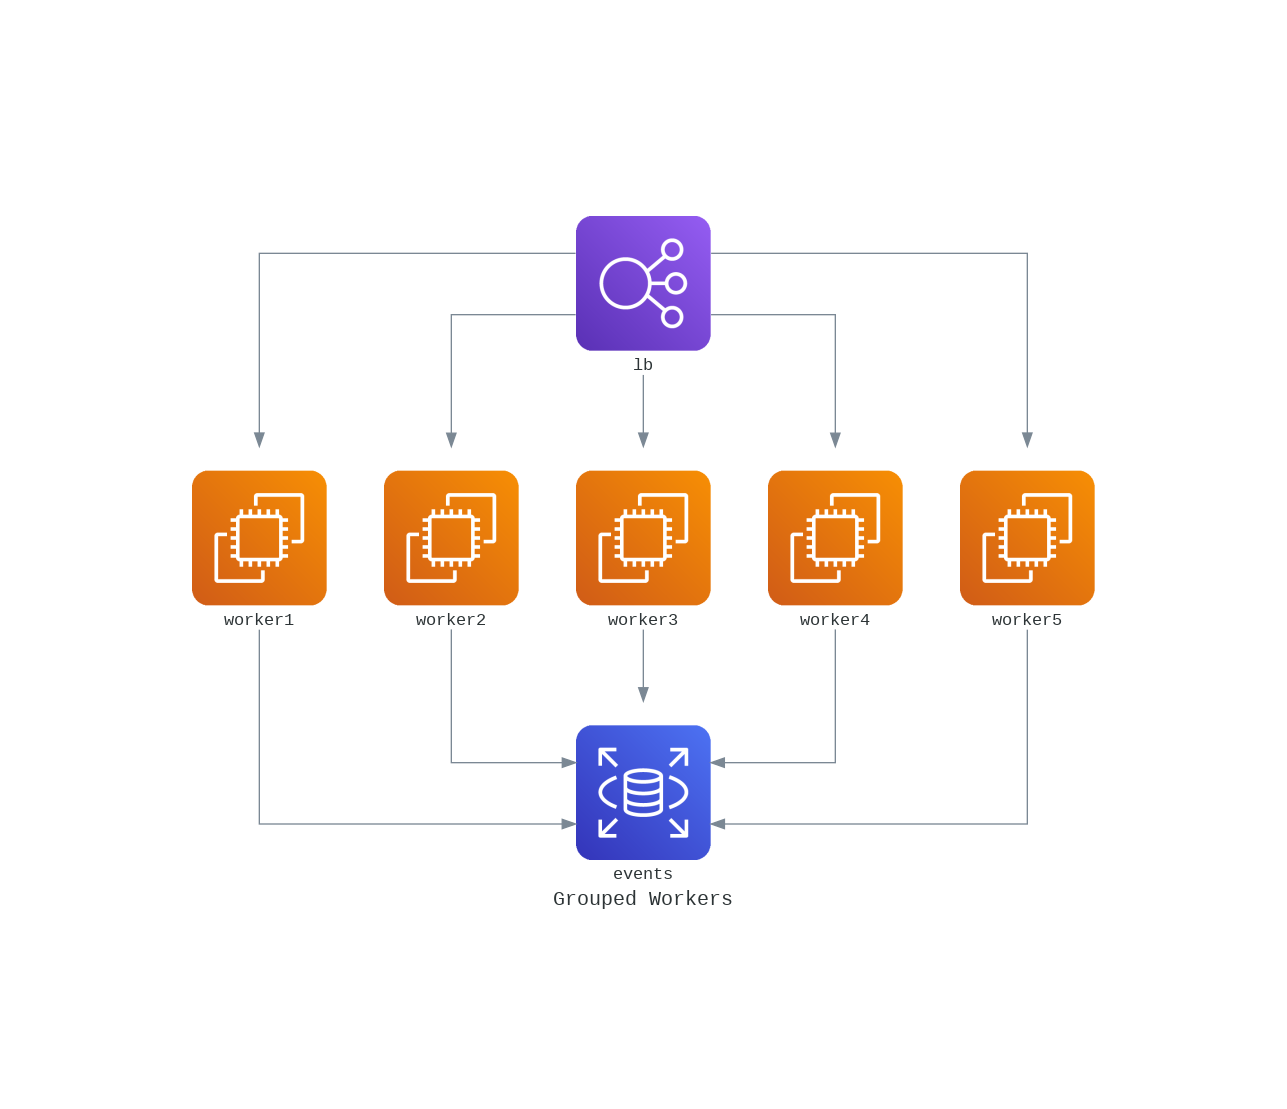

In [2]:
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
with Diagram("Grouped Workers", show=True, direction="TB") as diag:
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")
diag

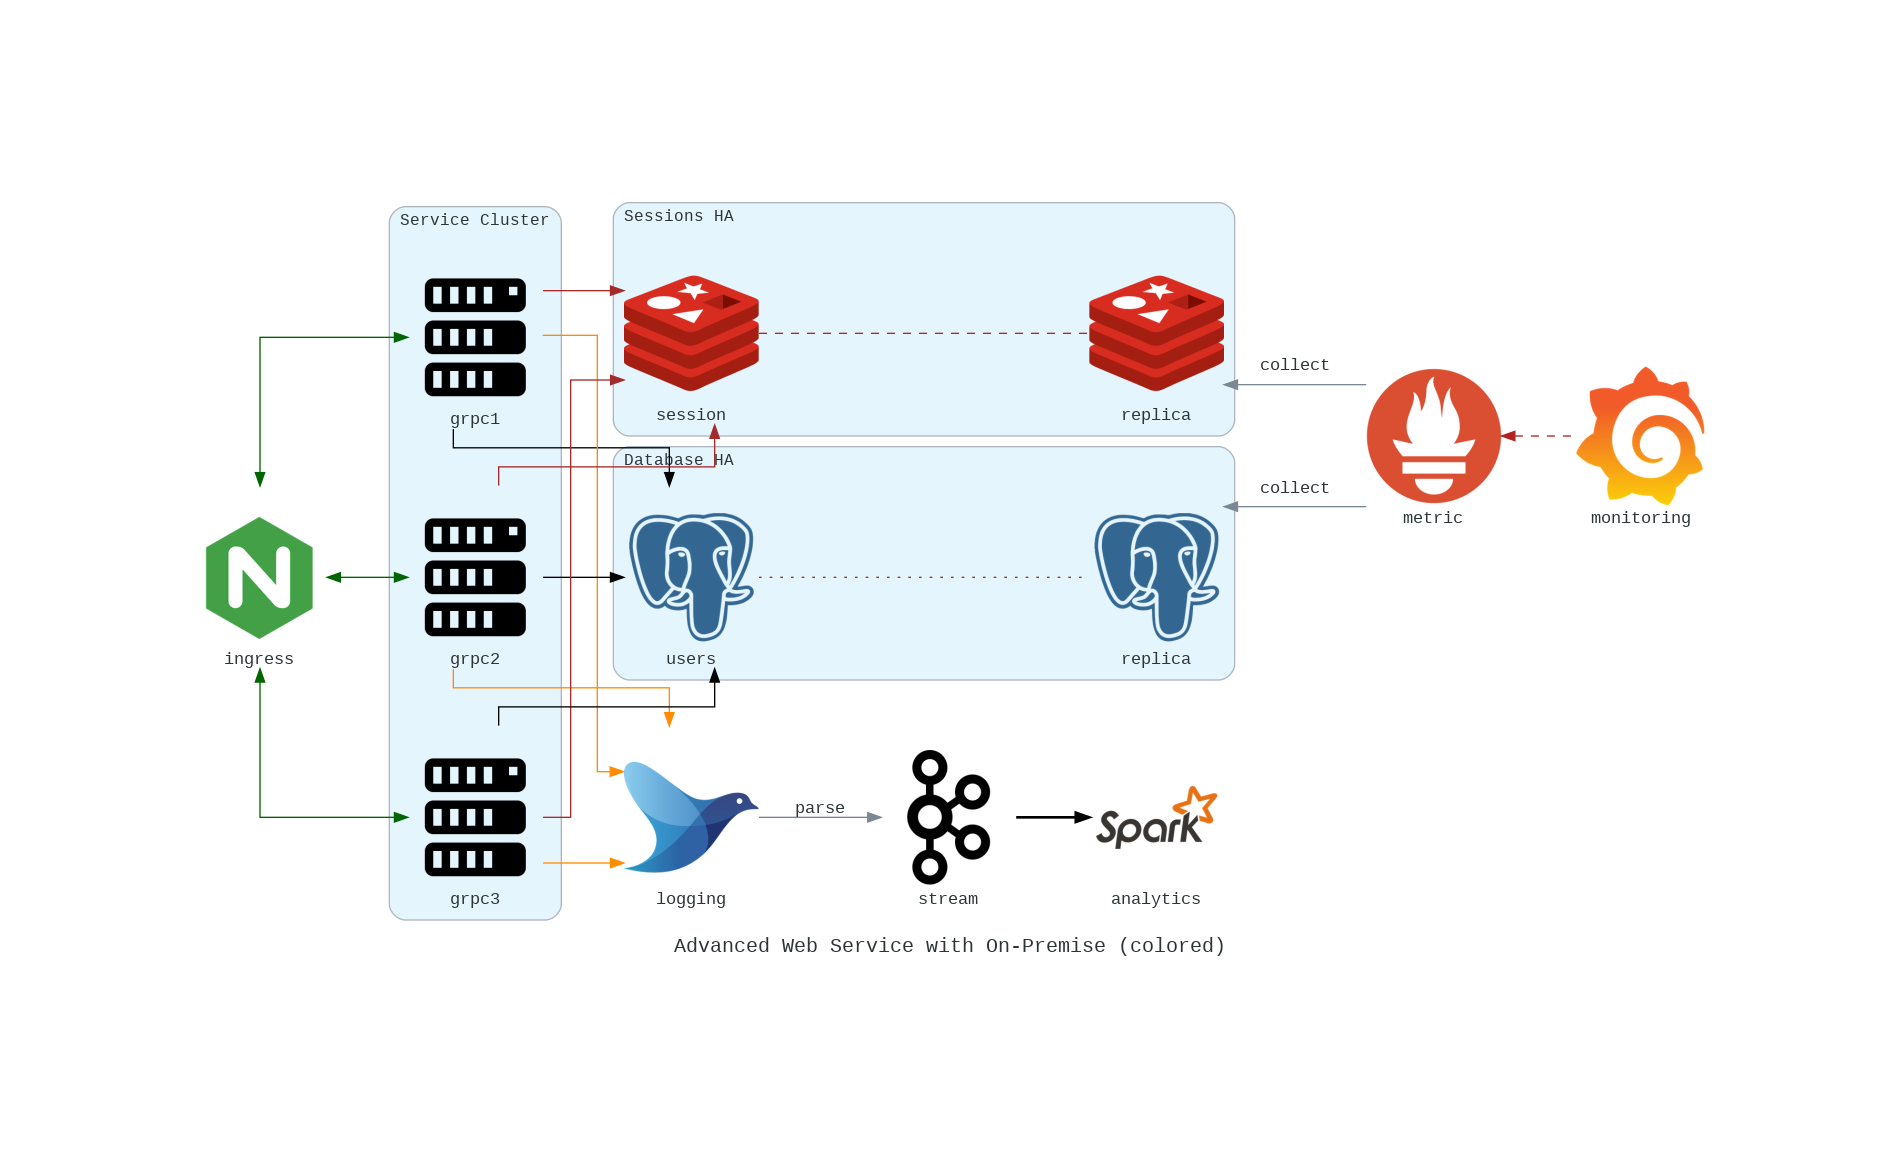

In [4]:
from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False) as diag:
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary - Edge(color="brown", style="dashed") - Redis("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary - Edge(color="brown", style="dotted") - PostgreSQL("replica") << Edge(label="collect") << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator >> Edge(label="parse") >> Kafka("stream") >> Edge(color="black", style="bold") >> Spark("analytics")

    ingress >> Edge(color="darkgreen") << grpcsvc >> Edge(color="darkorange") >> aggregator

diag